In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
filetoload1 = "Resources/city_data.csv"
filetoload2 = "Resources/ride_data.csv"

city_df = pd.read_csv(filetoload1)
ride_df = pd.read_csv(filetoload2)
city_df["type"].value_counts()

Urban       66
Suburban    36
Rural       18
Name: type, dtype: int64

In [4]:
ride_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [5]:
pyber_data_df = ride_df.merge(city_df,on="city", how="left")
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [6]:
# Create the Urban city DataFrame.

urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
urban_cities_df

# Create the Suburban and Rural city DataFrames.
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [7]:
# Get the number of rides for urban, suburban and rural cities.
urban_ride_ct = urban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_ct = suburban_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_ct = rural_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_ct

city
Amandaburgh            18
Barajasview            22
Carriemouth            27
Christopherfurt        27
Deanville              19
                       ..
West Patrickchester    16
West Robert            31
West Samuelburgh       25
Williamsstad           23
Williamsview           20
Name: ride_id, Length: 66, dtype: int64

In [8]:
# Get the average fares for urban, suburban and rural cities.
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]
urban_avg_fare

city
Amandaburgh            24.641667
Barajasview            25.332273
Carriemouth            28.314444
Christopherfurt        24.501852
Deanville              25.842632
                         ...    
West Patrickchester    28.233125
West Robert            25.123871
West Samuelburgh       21.767600
Williamsstad           24.362174
Williamsview           26.599000
Name: fare, Length: 66, dtype: float64

In [9]:
# Get the average number of drivers for urban, suburban and rural cities.
urban_driver_ct = urban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_ct = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_ct = rural_cities_df.groupby(["city"]).mean()["driver_count"]
urban_driver_ct 


city
Amandaburgh            12.0
Barajasview            26.0
Carriemouth            52.0
Christopherfurt        41.0
Deanville              49.0
                       ... 
West Patrickchester    25.0
West Robert            39.0
West Samuelburgh       73.0
Williamsstad           59.0
Williamsview           46.0
Name: driver_count, Length: 66, dtype: float64

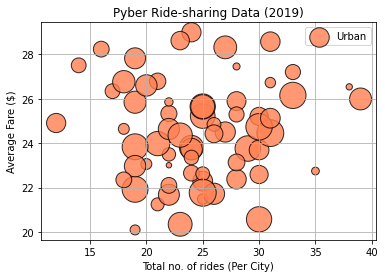

In [10]:
# Build the scatter plots for urban cities.
plt.scatter(urban_ride_ct,urban_avg_fare,s=10*urban_driver_ct,
           c="coral", edgecolor="black",
           linewidths = 1,
           alpha=0.8,label="Urban")
plt.title("Pyber Ride-sharing Data (2019)")
plt.xlabel("Total no. of rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid(True)
plt.legend()

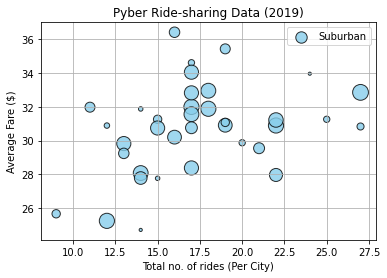

In [11]:
# Build the scatter plots for suburban cities.

plt.scatter(suburban_ride_ct, suburban_avg_fare, 
            s = 10 * suburban_driver_ct,
           c="skyblue", edgecolor = "black",
           linewidths = 1,
           alpha=0.8,label = "Suburban")

plt.title("Pyber Ride-sharing Data (2019)")
plt.xlabel("Total no. of rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid(True)
plt.legend()

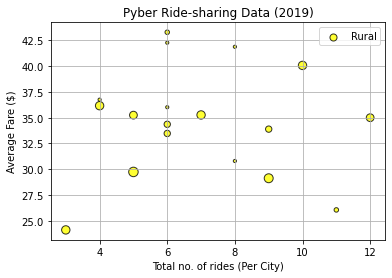

In [12]:
# Build the scatter plots for rural cities.

plt.scatter(rural_ride_ct, rural_avg_fare, 
            s = 10 * rural_driver_ct,
           c="yellow", edgecolor = "black",
           linewidths = 1,
           alpha=0.8,label = "Rural")

plt.title("Pyber Ride-sharing Data (2019)")
plt.xlabel("Total no. of rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid(True)
plt.legend()

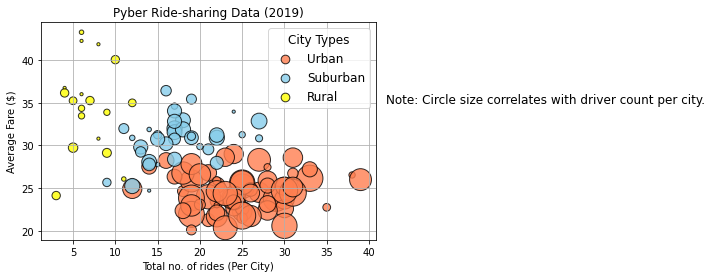

In [13]:
#combine all 3 charts
plt.scatter(urban_ride_ct,urban_avg_fare,s=10*urban_driver_ct,
           c="coral", edgecolor="black",
           linewidths = 1,
           alpha=0.8,label="Urban")

plt.scatter(suburban_ride_ct, suburban_avg_fare, 
            s = 10 * suburban_driver_ct,
           c="skyblue", edgecolor = "black",
           linewidths = 1,
           alpha=0.8,label = "Suburban")

plt.scatter(rural_ride_ct, rural_avg_fare, 
            s = 10 * rural_driver_ct,
           c="yellow", edgecolor = "black",
           linewidths = 1,
           alpha=0.8,label = "Rural")
plt.title("Pyber Ride-sharing Data (2019)")
plt.xlabel("Total no. of rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid(True)

# Create a legend

lgnd=plt.legend(fontsize="12", mode= "Expanded",
               scatterpoints=1, loc = "best",title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Incorporate a text label about circle size.
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")

# Save the figure.
plt.savefig("analysis/Fig1.png")


In [14]:
# Get summary statistics.
urban_cities_df.describe()
suburban_cities_df.describe()
rural_cities_df.describe()
urban_ride_ct.describe()
suburban_ride_ct.describe()
rural_ride_ct.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [15]:
# Calculate the mean of the ride count for each city type.
round(urban_ride_ct.mean(),2),round(suburban_ride_ct.mean(),2),round(rural_ride_ct.mean(),2)
round(urban_ride_ct.median(),2),round(suburban_ride_ct.median(),2),round(rural_ride_ct.median(),2)
round(urban_ride_ct.mode(),2),round(suburban_ride_ct.mode(),2),round(rural_ride_ct.mode(),2)

(0    22
 1    25
 dtype: int64,
 0    17
 dtype: int64,
 0    6
 dtype: int64)

In [16]:
# Import NumPy and the stats module from SciPy.
import numpy as np
import scipy.stats as sts

In [17]:
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_urban_ride_count = np.mean(urban_ride_ct)
mean_suburban_ride_count = np.mean(suburban_ride_ct)
mean_rural_ride_count = np.mean(rural_ride_ct)
print(f"The mean for the ride count for urban trips is {mean_urban_ride_count:.2f}")
print(f"The mean for the ride count for suburban trips is {mean_suburban_ride_count:.2f}")
print(f"The mean for the ride count for rural trips is {mean_rural_ride_count:.2f}")

median_urban_ride_ct = np.median(urban_ride_ct)
print(f"The median for the ride count for urban trips is {median_urban_ride_ct:.2f}")
median_suburban_ride_ct = np.median(suburban_ride_ct)
median_rural_ride_ct = np.median(rural_ride_ct)

mode_urban_ride_ct = sts.mode(urban_ride_ct)
mode_suburban_ride_ct = sts.mode(suburban_ride_ct)
mode_rural_ride_ct = sts.mode(rural_ride_ct)
print(f"The mode for the ride count for urban trips is {mode_urban_ride_ct}")
mode_suburban_ride_ct
mode_rural_ride_ct 

The mean for the ride count for urban trips is 24.62
The mean for the ride count for suburban trips is 17.36
The mean for the ride count for rural trips is 6.94
The median for the ride count for urban trips is 24.00
The mode for the ride count for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7]))


ModeResult(mode=array([6], dtype=int64), count=array([5]))

In [18]:
# Get the fares for the urban cities.
urban_fares =urban_cities_df["fare"]
mean_urban_fares = np.mean(urban_fares)
median_urban_fares = np.median(urban_fares)
mode_urban_fares = sts.mode(urban_fares)

print(f"The mean for the fare for urban trips is ${mean_urban_fares:.2f}")
print(f"The median for the fare for urban trips is ${median_urban_fares:.2f}")
print(f"The mode for the fare for urban trips is {mode_urban_fares}")

The mean for the fare for urban trips is $24.53
The median for the fare for urban trips is $24.64
The mode for the fare for urban trips is ModeResult(mode=array([22.86]), count=array([5]))


In [19]:
# Get the fares for the urban cities.
suburban_fares =suburban_cities_df["fare"]
mean_suburban_fares = np.mean(suburban_fares)
median_suburban_fares = np.median(suburban_fares)
mode_suburban_fares = sts.mode(suburban_fares)

print(f"The mean for the fare for suburban trips is ${mean_suburban_fares:.2f}")
print(f"The median for the fare for suburban trips is ${median_suburban_fares:.2f}")
print(f"The mode for the fare for suburban trips is {mode_suburban_fares}")

The mean for the fare for suburban trips is $30.97
The median for the fare for suburban trips is $30.75
The mode for the fare for suburban trips is ModeResult(mode=array([17.99]), count=array([3]))


In [20]:
# Get the fares for the urban cities.
rural_fares =rural_cities_df["fare"]
mean_rural_fares = np.mean(rural_fares)
median_rural_fares = np.median(rural_fares)
mode_rural_fares = sts.mode(rural_fares)

print(f"The mean for the fare for rural trips is ${mean_rural_fares:.2f}")
print(f"The median for the fare for rural trips is ${median_rural_fares:.2f}")
print(f"The mode for the fare for rural trips is {mode_rural_fares}")

The mean for the fare for rural trips is $34.62
The median for the fare for rural trips is $37.05
The mode for the fare for rural trips is ModeResult(mode=array([37.05]), count=array([2]))


In [21]:
# Get the driver count data from the urban cities.
urban_drivers = urban_cities_df["driver_count"]
suburban_drivers = suburban_cities_df["driver_count"]
rural_drivers = rural_cities_df["driver_count"]

mean_urban_drivers = np.mean(urban_drivers)
median_urban_drivers = np.median(urban_drivers)
mode_urban_drivers = sts.mode(urban_drivers)

mean_suburban_drivers = np.mean(suburban_drivers)
median_suburban_drivers = np.median(suburban_drivers)
mode_suburban_drivers = sts.mode(suburban_drivers)


mean_rural_drivers = np.mean(rural_drivers)
median_rural_drivers = np.median(rural_drivers)
mode_rural_drivers = sts.mode(rural_drivers)


print(f"The mean driver count for suburban trips is {mean_suburban_drivers:.0f}")

The mean driver count for suburban trips is 14


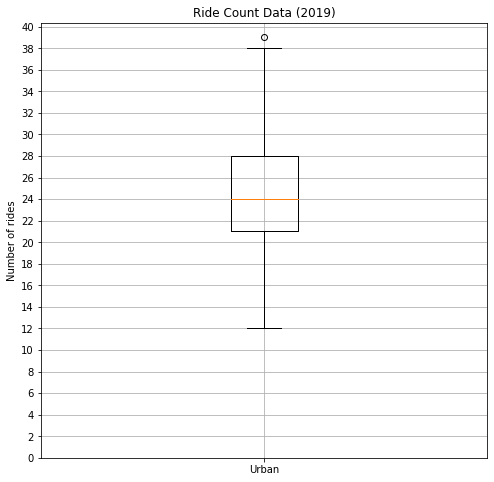

In [22]:
# Create a box-and-whisker plot for the urban cities ride count.
x_labels = ["Urban"]
fig,ax = plt.subplots(figsize = (8,8))
ax.boxplot(urban_ride_ct,labels = x_labels)

# Add the title, y-axis label and grid.

ax.set_title("Ride Count Data (2019)")
ax.set_ylabel("Number of rides")
ax.set_yticks(np.arange(0,41,2))
ax.grid()
plt.show()

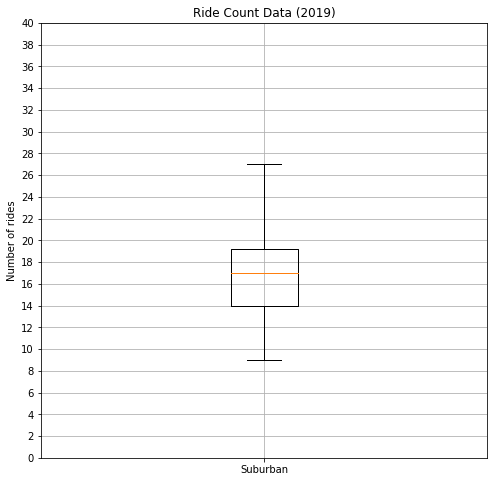

In [23]:
#Create a box-and-whisker plot for the suburban cities ride count.
x_labels = ["Suburban"]
fig,ax = plt.subplots(figsize = (8,8))
ax.boxplot(suburban_ride_ct,labels = x_labels)

# Add the title, y-axis label and grid.

ax.set_title("Ride Count Data (2019)")
ax.set_ylabel("Number of rides")
ax.set_yticks(np.arange(0,41,2))
ax.grid()
plt.show()

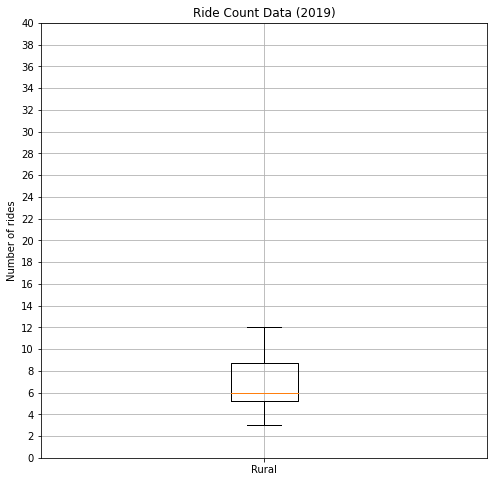

In [24]:
#Create a box-and-whisker plot for the rural cities ride count.
x_labels = ["Rural"]
fig,ax = plt.subplots(figsize = (8,8))
ax.boxplot(rural_ride_ct,labels = x_labels)

# Add the title, y-axis label and grid.

ax.set_title("Ride Count Data (2019)")
ax.set_ylabel("Number of rides")
ax.set_yticks(np.arange(0,41,2))
ax.grid()
plt.show()

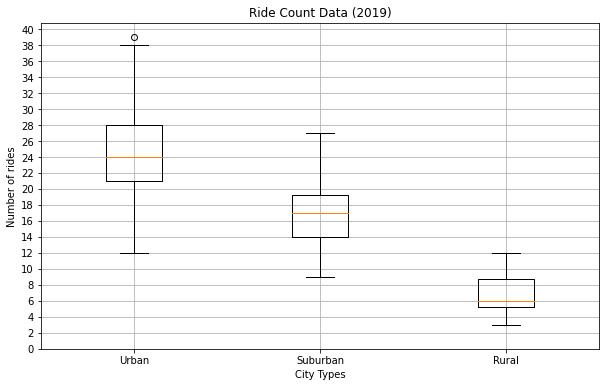

In [25]:
# Add all ride count box-and-whisker plots to the same graph.
x_labels = ["Urban","Suburban","Rural"]
ride_count_data = [urban_ride_ct,suburban_ride_ct, rural_ride_ct]
fig,ax = plt.subplots(figsize = (10,6))
ax.boxplot(ride_count_data,labels = x_labels)

# Add the title, y-axis label and grid.

ax.set_title("Ride Count Data (2019)")
ax.set_ylabel("Number of rides")
ax.set_xlabel("City Types")
ax.set_yticks(np.arange(0,41,2))
ax.grid()

# Save the figure.
plt.savefig("analysis/Fig2.png")
plt.show()

In [26]:
# Get the city that matches 39.
urban_city_outlier = urban_ride_ct[urban_ride_ct == 39]
urban_city_outlier

city
West Angela    39
Name: ride_id, dtype: int64

In [32]:
# Get the sum of the fares for each city type.

sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]


# Get the sum of all the fares.
total_fares = pyber_data_df["fare"].sum()

# Calculate the percentage of fare for each city type.

type_percents = 100 * (sum_fares_by_type/total_fares)

type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

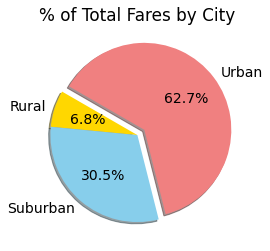

In [52]:
# Build the percentage of fares by city type pie chart.

# Import mpl to change the plot configurations using rcParams.

import matplotlib as mpl

explode = (0,0,0.1)
plt.pie(type_percents, 
        labels=["Rural", "Suburban", "Urban"],
        colors = ["gold","skyblue","lightcoral"],
        autopct = "%1.1f%%",
        explode = explode,
        startangle = 150,
        shadow = True
       )
plt.title("% of Total Fares by City")

# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
plt.savefig("analysis/fig3.png")
plt.show()

In [53]:
# Get the total rides for each city type.

sum_rides_by_type = pyber_data_df.groupby(["type"]).count()["ride_id"]


# Get the sum of all the fares.
total_rides = pyber_data_df["ride_id"].count()

# Calculate the percentage of fare for each city type.

type_ride_percents = 100 * (sum_rides_by_type/total_rides)

type_ride_percents

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

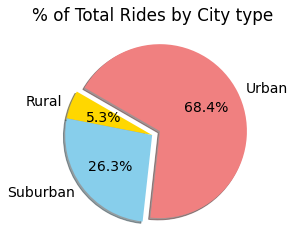

In [54]:
# Build the percentage of rides by city type pie chart.

# Import mpl to change the plot configurations using rcParams.

import matplotlib as mpl

explode = (0,0,0.1)
plt.pie(type_ride_percents, 
        labels=["Rural", "Suburban", "Urban"],
        colors = ["gold","skyblue","lightcoral"],
        autopct = "%1.1f%%",
        explode = explode,
        startangle = 150,
        shadow = True
       )
plt.title("% of Total Rides by City type")

# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
plt.savefig("analysis/fig4.png")
plt.show()